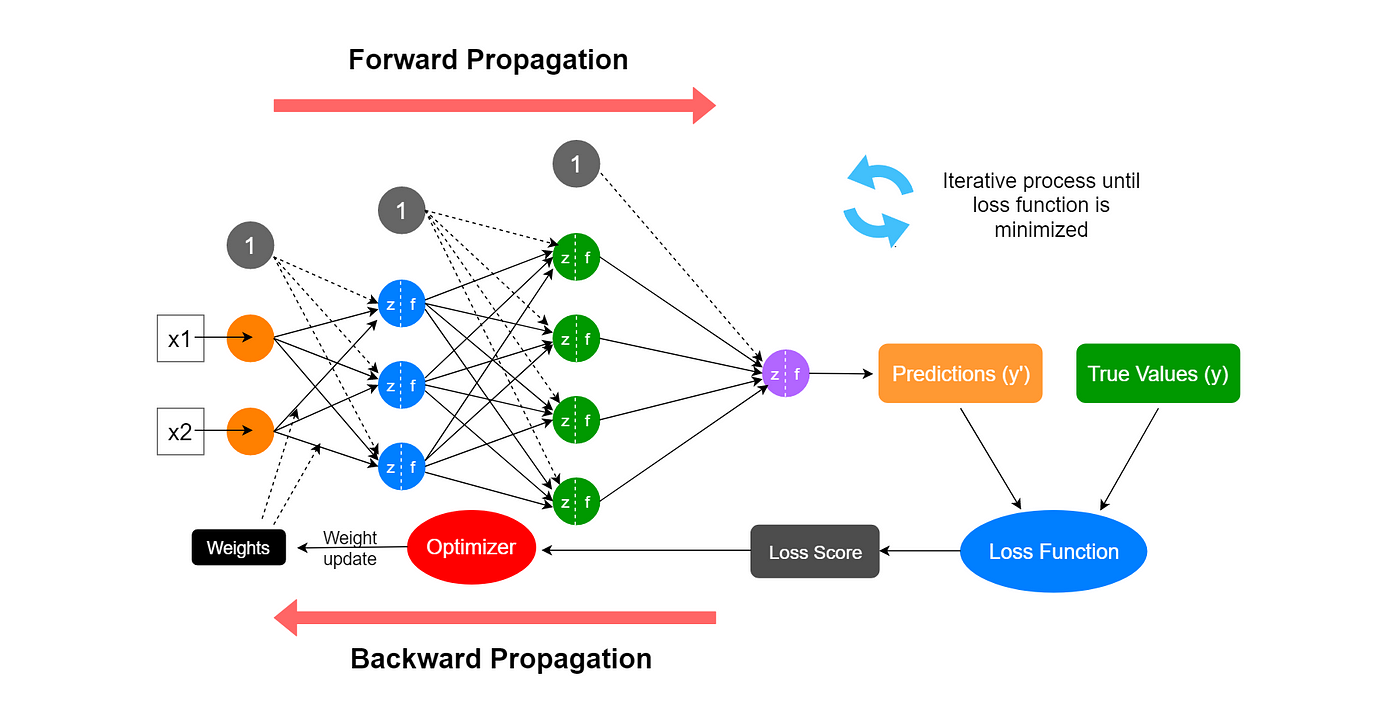

In [ ]:
z = w1*x1 + w2*x2

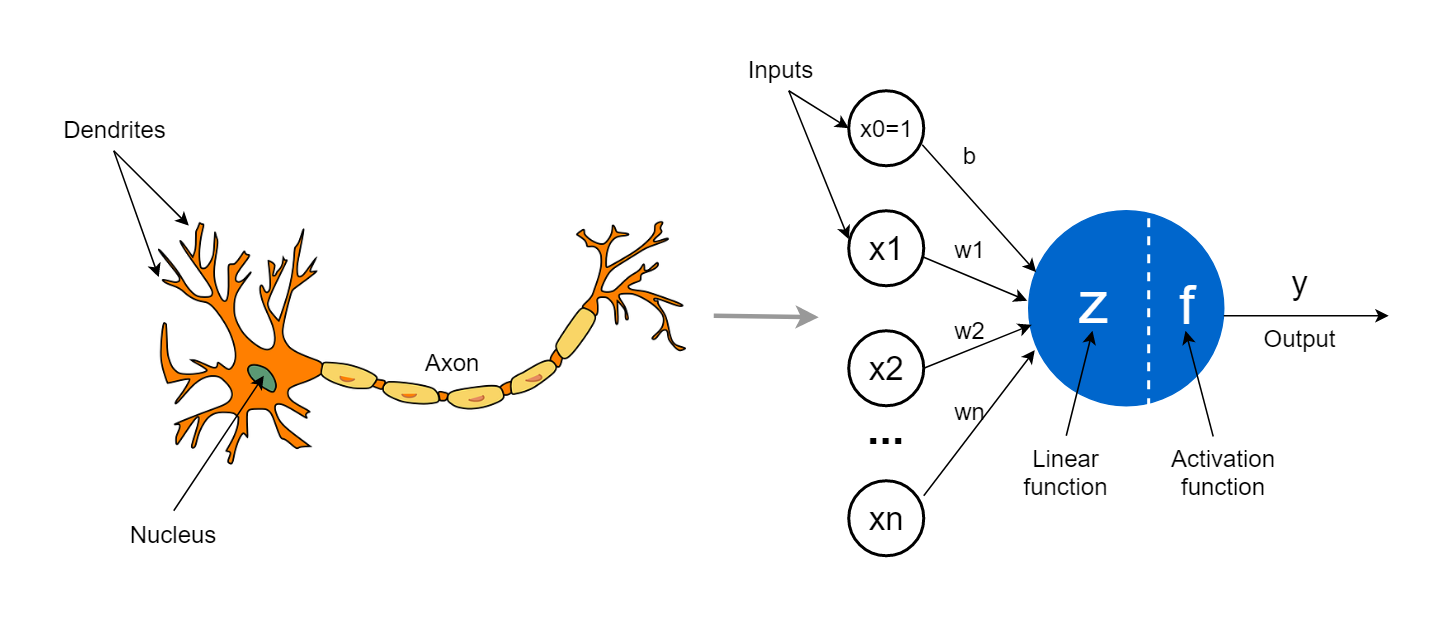

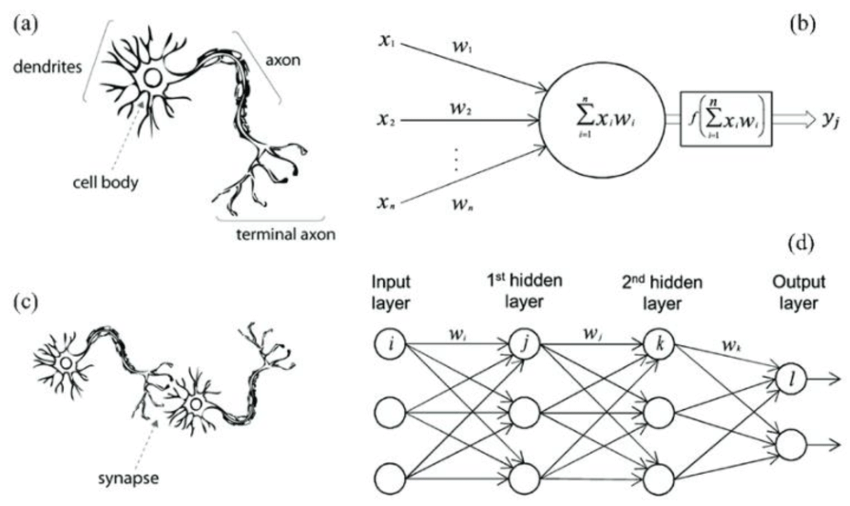

## 🧠 Simple Explanation: The Touch Decision Neuron

Let me explain this in the simplest way possible!

### 🎯 **What are we trying to do?**
We're teaching a computer to make the same decision you make every day: **"Should I touch this object or not?"**

---

### 📊 **The Inputs (Information we consider)**

**1. Temperature (0 to 1)**
- `0` = Very cold ❄️
- `0.5` = Room temperature 🌡️
- `1` = Very hot 🔥
- **Example:** Hot iron = 0.9, Ice cube = 0.1

**2. Familiarity (0 to 1)**
- `0` = Never seen before 😕
- `0.5` = Seen sometimes 🤔
- `1` = Very familiar 😊
- **Example:** Your phone = 0.9, Random object at airport = 0.1

---

### ⚖️ **The Weights (How important is each input?)**

**Temperature Weight = -2.0** (NEGATIVE)
- Negative means: "The hotter it is, the LESS likely I'll touch it"
- Think: Hot things are dangerous! 🔥➡️❌

**Familiarity Weight = +1.5** (POSITIVE)  
- Positive means: "The more familiar, the MORE likely I'll touch it"
- Think: I trust things I know! 😊➡️✅

---

### 🎯 **The Bias = 0.5**
Think of bias as your **"default caution level"**:
- Positive bias = "I'm naturally cautious"
- Zero bias = "I'm neutral"
- Negative bias = "I'm naturally adventurous"

Our bias of 0.5 means we're **slightly cautious by default**.

---

### 🧮 **How the Decision Works**

**Step 1: Calculate a score**
```
Score = (Temperature × -2.0) + (Familiarity × 1.5) + 0.5
```

**Real Example:**
Hot unknown object (like a hot iron):
- Temperature = 0.9 (very hot)
- Familiarity = 0.2 (don't know it well)

```
Score = (0.9 × -2.0) + (0.2 × 1.5) + 0.5
      = -1.8 + 0.3 + 0.5
      = -1.0 (negative score!)
```

**Step 2: Convert score to probability (0 to 1)**
Using sigmoid function (don't worry about the math), -1.0 becomes **0.27**

**Step 3: Make decision**
- Probability = 0.27 means **27% chance I'll touch it**
- Since 27% < 50%, decision = **"Don't touch!"** ⚠️

---

### 💡 **The Simple Logic**

The neuron learned a simple rule:
1. **Hot things get negative points** (dangerous!)
2. **Familiar things get positive points** (safe!)
3. **Add them up** with slight caution
4. If total score is positive → "Touch it" ✅
5. If total score is negative → "Don't touch" ❌

---

### 🎭 **Real-Life Examples**

**Your Morning Coffee Mug** ☕
- Temperature: 0.6 (warm, not burning)
- Familiarity: 0.9 (your favorite mug!)
- **Result:** Safe to touch! ✅

**Random Metal Object in Sun** 🔥
- Temperature: 0.8 (very hot from sun)
- Familiarity: 0.1 (what is this?)
- **Result:** Don't touch! ⚠️

**Your Phone** 📱
- Temperature: 0.3 (room temp)
- Familiarity: 1.0 (use it every day!)
- **Result:** Of course, touch it! ✅

---

### 🎯 **Why This Matters**

This simple example shows how:
1. **Neural networks make decisions** like humans
2. **Weights** = Importance of each factor
3. **Bias** = Natural tendency
4. **Probability** = How confident the decision is

**This is exactly how AI works!** Just with millions of these neurons working together instead of just one! 🚀



In [ ]:
import numpy as np

class SimpleNeuron:
    """
    A single neuron - the building block of neural networks.
    This demonstrates how a neuron processes inputs and makes decisions.
    """

    def __init__(self, n_inputs=2, weights=None, bias=None):
        """
        Initialize the neuron with weights and bias.

        Args:
            n_inputs: Number of input features
            weights: Initial weights (if None, uses small random values)
            bias: Initial bias (if None, starts at 0)
        """
        if weights is None:
            # Random initialization (small values to prevent saturation)
            self.weights = np.random.randn(n_inputs) * 0.01
        else:
            self.weights = np.array(weights)

        if bias is None:
            self.bias = 0.0
        else:
            self.bias = bias

        print(f"🔬 Neuron initialized!")
        print(f"   Weights: {self.weights}")
        print(f"   Bias: {self.bias}")

    def sigmoid(self, z):
        """
        Sigmoid activation function: squashes any value to [0, 1]

        Args:
            z: Linear combination (can be any real number)

        Returns:
            Value between 0 and 1 (probability-like)
        """
        return 1 / (1 + np.exp(-z))

    def process(self, inputs):
        """
        Process inputs through the neuron.

        Args:
            inputs: Array of input values

        Returns:
            Output between 0 and 1
        """
        # Step 1: Linear combination (weighted sum + bias)
        z = np.dot(self.weights, inputs) + self.bias

        # Step 2: Apply activation function
        output = self.sigmoid(z)

        return output, z  # Return both for educational purposes

    def decide(self, inputs, threshold=0.5):
        """
        Make a binary decision based on inputs.

        Args:
            inputs: Array of input values
            threshold: Decision threshold (default 0.5)

        Returns:
            Boolean decision and probability
        """
        probability, z = self.process(inputs)
        decision = probability >= threshold
        return decision, probability, z

In [ ]:

# ============================================
# EXAMPLE 1: Touch Decision Neuron
# ============================================
print("="*60)
print("🤚 EXAMPLE 1: Should I Touch This Object?")
print("="*60)

class TouchDecisionNeuron(SimpleNeuron):
    """
    A specialized neuron for deciding whether to touch an object.
    """

    def __init__(self):
        # Initialize with specific learned weights
        weights = [-2.0, 1.5]  # [temperature_weight, familiarity_weight]
        bias = 0.5  # Slightly cautious
        super().__init__(n_inputs=2, weights=weights, bias=bias)

        print("\n🧠 Touch Decision Neuron Configuration:")
        print("   Temperature weight: -2.0 (negative = avoid hot)")
        print("   Familiarity weight: 1.5 (positive = trust familiar)")
        print("   Bias: 0.5 (slightly cautious)")

    def should_i_touch(self, temperature, familiarity):
        """
        Decide whether to touch an object based on temperature and familiarity.

        Args:
            temperature: 0 (cold) to 1 (hot)
            familiarity: 0 (unknown) to 1 (familiar)

        Returns:
            Decision string and probability
        """
        inputs = np.array([temperature, familiarity])
        decision, probability, z = self.decide(inputs)

        print(f"\n📊 Analysis:")
        print(f"   Inputs: Temperature={temperature}, Familiarity={familiarity}")
        print(f"   Linear combination (z): {z:.3f}")
        print(f"   Probability of touching: {probability:.3f} ({probability*100:.1f}%)")

        if decision:
            return "✅ Safe to touch!", probability
        else:
            return "⚠️ Don't touch!", probability


# Create and test the touch decision neuron
touch_neuron = TouchDecisionNeuron()

# Test Case 1: Hot and Unknown
print("\n" + "-"*40)
print("Test 1: Hot Iron (hot & unknown)")
result, prob = touch_neuron.should_i_touch(temperature=0.9, familiarity=0.2)
print(f"Decision: {result}")

# Test Case 2: Cold and Familiar
print("\n" + "-"*40)
print("Test 2: Your Phone (cool & familiar)")
result, prob = touch_neuron.should_i_touch(temperature=0.3, familiarity=0.9)
print(f"Decision: {result}")

# Test Case 3: Warm and Semi-familiar
print("\n" + "-"*40)
print("Test 3: Coffee Mug (warm & semi-familiar)")
result, prob = touch_neuron.should_i_touch(temperature=0.6, familiarity=0.7)
print(f"Decision: {result}")

🤚 EXAMPLE 1: Should I Touch This Object?
🔬 Neuron initialized!
   Weights: [-2.   1.5]
   Bias: 0.5

🧠 Touch Decision Neuron Configuration:
   Temperature weight: -2.0 (negative = avoid hot)
   Familiarity weight: 1.5 (positive = trust familiar)
   Bias: 0.5 (slightly cautious)

----------------------------------------
Test 1: Hot Iron (hot & unknown)

📊 Analysis:
   Inputs: Temperature=0.9, Familiarity=0.2
   Linear combination (z): -1.000
   Probability of touching: 0.269 (26.9%)
Decision: ⚠️ Don't touch!

----------------------------------------
Test 2: Your Phone (cool & familiar)

📊 Analysis:
   Inputs: Temperature=0.3, Familiarity=0.9
   Linear combination (z): 1.250
   Probability of touching: 0.777 (77.7%)
Decision: ✅ Safe to touch!

----------------------------------------
Test 3: Coffee Mug (warm & semi-familiar)

📊 Analysis:
   Inputs: Temperature=0.6, Familiarity=0.7
   Linear combination (z): 0.350
   Probability of touching: 0.587 (58.7%)
Decision: ✅ Safe to touch!



📧 EXAMPLE 2: Spam Email Detection Neuron
🔬 Neuron initialized!
   Weights: [-0.00866586 -0.00515072 -0.00236519]
   Bias: 0.0

🔍 Spam Detection Features:
   1. Has suspicious links (0-1)
   2. From known sender (0-1)
   3. Has urgency words (0-1)

📊 Spam Detection Results:

Suspicious email:
   Features: [0.9, 0.1, 0.8]
   Linear combination: 3.050
   Spam probability: 0.955 (95.5%)
   Classification: 🚫 SPAM

Normal email:
   Features: [0.2, 0.9, 0.1]
   Linear combination: -1.650
   Spam probability: 0.161 (16.1%)
   Classification: ✅ NOT SPAM

Borderline email:
   Features: [0.5, 0.5, 0.6]
   Linear combination: 1.050
   Spam probability: 0.741 (74.1%)
   Classification: 🚫 SPAM

📝 EXAMPLE 3: Manual Step-by-Step Calculation
🔬 Neuron initialized!
   Weights: [0.5 0.3]
   Bias: -0.1

📥 Inputs: x1=2.0, x2=3.0
⚙️ Weights: w1=0.5, w2=0.3
📍 Bias: b=-0.1

🔢 Step-by-Step Calculation:
   Step 1: Calculate weighted sum
          z = w1*x1 + w2*x2 + b
          z = 0.5*2.0 + 0.3*3.0 + -0.1
    

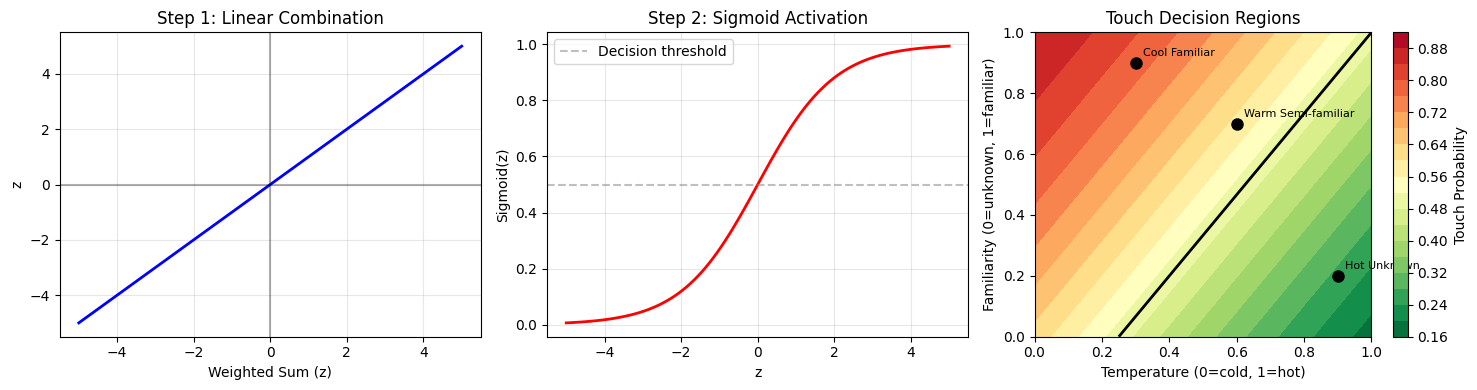


✅ Complete! The neuron is the building block of neural networks.
   Multiple neurons together = Neural Network! 🧠


In [ ]:
# ============================================
# EXAMPLE 2: Generic Binary Classification
# ============================================
print("\n" + "="*60)
print("📧 EXAMPLE 2: Spam Email Detection Neuron")
print("="*60)

# Create a spam detection neuron
spam_neuron = SimpleNeuron(n_inputs=3)  # 3 features for spam detection

# Manually set weights (as if trained)
spam_neuron.weights = np.array([2.0, -1.5, 3.0])  # [has_links, from_known, has_urgency]
spam_neuron.bias = -1.0

print("\n🔍 Spam Detection Features:")
print("   1. Has suspicious links (0-1)")
print("   2. From known sender (0-1)")
print("   3. Has urgency words (0-1)")

# Test emails
test_emails = [
    ("Suspicious email", [0.9, 0.1, 0.8]),  # Many links, unknown sender, urgent
    ("Normal email", [0.2, 0.9, 0.1]),      # Few links, known sender, not urgent
    ("Borderline email", [0.5, 0.5, 0.6])   # Some links, semi-known, somewhat urgent
]

print("\n📊 Spam Detection Results:")
for name, features in test_emails:
    _, prob, z = spam_neuron.decide(features)
    is_spam = "🚫 SPAM" if prob > 0.5 else "✅ NOT SPAM"
    print(f"\n{name}:")
    print(f"   Features: {features}")
    print(f"   Linear combination: {z:.3f}")
    print(f"   Spam probability: {prob:.3f} ({prob*100:.1f}%)")
    print(f"   Classification: {is_spam}")


# ============================================
# EXAMPLE 3: Step-by-Step Calculation
# ============================================
print("\n" + "="*60)
print("📝 EXAMPLE 3: Manual Step-by-Step Calculation")
print("="*60)

# Create a simple neuron with known weights
demo_neuron = SimpleNeuron(n_inputs=2, weights=[0.5, 0.3], bias=-0.1)

# Input values
x1, x2 = 2.0, 3.0

print(f"\n📥 Inputs: x1={x1}, x2={x2}")
print(f"⚙️ Weights: w1={demo_neuron.weights[0]}, w2={demo_neuron.weights[1]}")
print(f"📍 Bias: b={demo_neuron.bias}")

# Manual calculation
print("\n🔢 Step-by-Step Calculation:")
print(f"   Step 1: Calculate weighted sum")
print(f"          z = w1*x1 + w2*x2 + b")
print(f"          z = {demo_neuron.weights[0]}*{x1} + {demo_neuron.weights[1]}*{x2} + {demo_neuron.bias}")
print(f"          z = {demo_neuron.weights[0]*x1} + {demo_neuron.weights[1]*x2} + {demo_neuron.bias}")
z_manual = demo_neuron.weights[0]*x1 + demo_neuron.weights[1]*x2 + demo_neuron.bias
print(f"          z = {z_manual}")

print(f"\n   Step 2: Apply sigmoid activation")
print(f"          output = 1 / (1 + e^(-z))")
print(f"          output = 1 / (1 + e^(-{z_manual}))")
print(f"          output = 1 / (1 + {np.exp(-z_manual):.4f})")
output_manual = 1 / (1 + np.exp(-z_manual))
print(f"          output = {output_manual:.4f}")

# Verify with neuron's process method
output_auto, z_auto = demo_neuron.process([x1, x2])
print(f"\n✅ Verification using neuron.process():")
print(f"   Output: {output_auto:.4f}")
print(f"   Match: {np.isclose(output_manual, output_auto)}")


# ============================================
# VISUALIZATION
# ============================================
print("\n" + "="*60)
print("📊 BONUS: Visualizing Neuron Behavior")
print("="*60)

import matplotlib.pyplot as plt

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Linear combination (z values)
z_values = np.linspace(-5, 5, 100)
axes[0].plot(z_values, z_values, 'b-', linewidth=2)
axes[0].set_title('Step 1: Linear Combination')
axes[0].set_xlabel('Weighted Sum (z)')
axes[0].set_ylabel('z')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot 2: Sigmoid activation
sigmoid_values = 1 / (1 + np.exp(-z_values))
axes[1].plot(z_values, sigmoid_values, 'r-', linewidth=2)
axes[1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Decision threshold')
axes[1].set_title('Step 2: Sigmoid Activation')
axes[1].set_xlabel('z')
axes[1].set_ylabel('Sigmoid(z)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Plot 3: Decision regions for touch neuron
temp_range = np.linspace(0, 1, 50)
fam_range = np.linspace(0, 1, 50)
temp_grid, fam_grid = np.meshgrid(temp_range, fam_range)

touch_neuron_viz = TouchDecisionNeuron()
decisions = np.zeros_like(temp_grid)

for i in range(len(temp_range)):
    for j in range(len(fam_range)):
        _, prob, _ = touch_neuron_viz.decide([temp_grid[i,j], fam_grid[i,j]])
        decisions[i,j] = prob

contour = axes[2].contourf(temp_grid, fam_grid, decisions, levels=20, cmap='RdYlGn_r')
axes[2].contour(temp_grid, fam_grid, decisions, levels=[0.5], colors='black', linewidths=2)
axes[2].set_title('Touch Decision Regions')
axes[2].set_xlabel('Temperature (0=cold, 1=hot)')
axes[2].set_ylabel('Familiarity (0=unknown, 1=familiar)')
plt.colorbar(contour, ax=axes[2], label='Touch Probability')

# Add example points
examples = [
    (0.9, 0.2, 'Hot Unknown'),
    (0.3, 0.9, 'Cool Familiar'),
    (0.6, 0.7, 'Warm Semi-familiar')
]
for temp, fam, label in examples:
    axes[2].plot(temp, fam, 'ko', markersize=8)
    axes[2].annotate(label, (temp, fam), xytext=(5, 5),
                    textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

print("\n✅ Complete! The neuron is the building block of neural networks.")
print("   Multiple neurons together = Neural Network! 🧠")

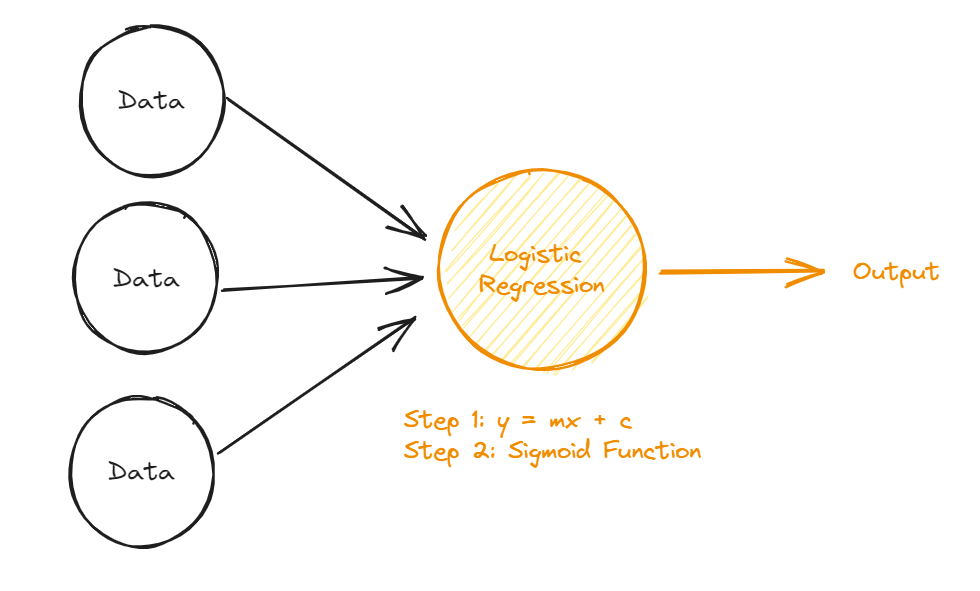

In [ ]:
class MultiClassNetwork:
    def __init__(self, n_features=2, n_classes=3):
        """
        Create a network for multi-class classification
        n_features: number of input features (like x1, x2)
        n_classes: number of output classes (like A, B, C)
        """
        # Instead of single weights, we have a weight MATRIX
        # Shape: (n_features, n_classes) = (2, 3)
        self.W = np.random.randn(n_features, n_classes) * 0.01

        # One bias per output neuron
        # Shape: (1, n_classes) = (1, 3)
        self.b = np.zeros((1, n_classes))

    def forward(self, X):
        """
        X: Input data, shape (n_samples, n_features)
        Returns: Probabilities for each class
        """
        # This is the magic! Matrix multiplication does ALL neurons at once
        Z = np.dot(X, self.W) + self.b
        # Z shape: (n_samples, n_classes)

        # Apply activation to get probabilities
        return self.softmax(Z)